<a href="https://colab.research.google.com/github/stazam/M7DataSp---Advanced-data-science-techniques/blob/main/inlineVSquads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import cv2


from keras.utils import np_utils
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.3.0


#Data uploading from directory

In [ ]:
from google.colab import files
uploaded = files.upload()

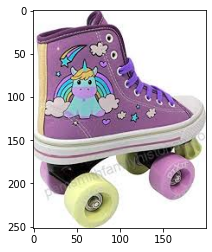

In [161]:
img = cv2.imread('q150.jfif')
plt.imshow(img)

In [66]:
import os 
import cv2
local_download_path = os.path.expanduser('/content/')

labels = []
images = []

for file in os.listdir(local_download_path):

    file_name, file_extension = os.path.splitext(file)
    if (file_extension in ['.png','.jpg']):
       img = cv2.imread(file)
       img = cv2.resize(img,(160,160))     
       images.append(img)

       if file[0] == "q":
           labels.append(0)
       else:
           labels.append(1)

images = np.array(images)
labels = np.array(labels)

In [67]:
print(images.shape)
print(labels.shape)


image = cv2.imread("in1.jpg")
print("Max intensity of pixels is: %d and minimal intensity is: %d " %(image.max(),image.min()))

(262, 160, 160, 3)
(262,)
Max intensity of pixels is: 255 and minimal intensity is: 0 


In [80]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size = 0.8, random_state = 20)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

X_train = X_train/255
X_test = X_test/255

In [81]:
y_test

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1.], dtype=float32)

In [73]:
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras import optimizers

In [74]:
train_datagen = ImageDataGenerator(
rotation_range=20,
horizontal_flip=True)

In [96]:
img_size = 160
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_size, img_size, 3))

top_model = Sequential()

top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(128, activation="relu"))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation="sigmoid"))

new_model = Sequential() #new model
for layer in model.layers: 
    new_model.add(layer)
    
new_model.add(top_model)


for layer in model.layers[:21]:
    layer.trainable = False


new_model.compile(loss="binary_crossentropy",
 optimizer= 'rmsprop',
 metrics=["accuracy"])

model.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

#Transfer learning

In [97]:
models_data = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=16),epochs=6,validation_data=(X_test,y_test))             


Epoch 1/6
14/14 [==============================] - 80s 6s/step - loss: 0.3813 - accuracy: 0.8325 - val_loss: 0.6197 - val_accuracy: 0.7358
Epoch 2/6
14/14 [==============================] - 80s 6s/step - loss: 0.0950 - accuracy: 0.9617 - val_loss: 0.1981 - val_accuracy: 0.8868
Epoch 3/6
14/14 [==============================] - 80s 6s/step - loss: 0.1208 - accuracy: 0.9426 - val_loss: 0.2606 - val_accuracy: 0.8868
Epoch 4/6
14/14 [==============================] - 80s 6s/step - loss: 0.0742 - accuracy: 0.9665 - val_loss: 0.3935 - val_accuracy: 0.8302
Epoch 5/6
14/14 [==============================] - 80s 6s/step - loss: 0.1057 - accuracy: 0.9522 - val_loss: 0.1180 - val_accuracy: 0.9623
Epoch 6/6
14/14 [==============================] - 80s 6s/step - loss: 0.0445 - accuracy: 0.9904 - val_loss: 0.0668 - val_accuracy: 0.9623


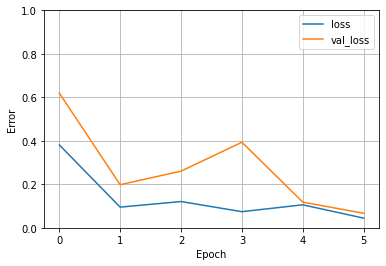

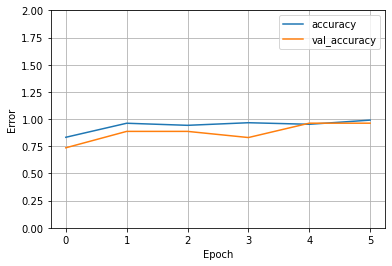

In [104]:
def plot_loss(model):
  plt.figure(1)
  plt.plot(model.history['loss'], label='loss')
  plt.plot(model.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

  plt.figure(2)
  plt.plot(model.history['accuracy'], label='accuracy')
  plt.plot(model.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)


plot_loss(models_data)

In [106]:
new_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

#Fine tunning


In [108]:
for layer in new_model.layers[:21]:
    layer.trainable = True

In [110]:
new_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 40, 40, 256)     

In [113]:
models_data_fine_tunning = new_model.fit(train_datagen.flow(X_train, y_train, batch_size=16),epochs=1,validation_data=(X_test,y_test))        

14/14 [==============================] - 85s 6s/step - loss: 0.0227 - accuracy: 0.9952 - val_loss: 0.0621 - val_accuracy: 0.9811


In [116]:
new_model.save(r"quadsVSinlien.h5")

In [158]:
def prediction(file):

  img = cv2.imread(file)
  img = cv2.resize(img,(160,160))
  plt.imshow(img)
  img = img/255
  img = np.expand_dims(img, axis=0)

  prediction = new_model.predict(img)[0,0]
  if prediction < 0.5:
    return "quads"
  else:
    return "inline"


'inline'

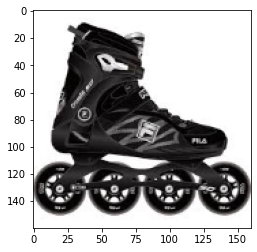

In [160]:
prediction("in1.jpg")

